# Affichage des températures sur l'état des chiots

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline



## Température mort 

In [3]:
data = pd.read_excel("DataChiot.xlsx")
del data['Diarr']
del data['hospit']
data

,Size,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,TRD29,...,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56,Died
0,S,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,37.5,...,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN,1
1,S,37.4,37.8,37.3,37.8,37.8,37.6,37.3,37.3,37.7,...,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3,0
2,S,37.3,37.5,37.6,37.5,37.4,37.5,37.7,37.7,37.6,...,38.2,38.4,38.1,38.8,39.1,37.4,38.0,38.2,37.6,0
3,S,37.3,37.8,36.9,37.9,37.5,37.7,37.7,37.7,37.8,...,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN,0
4,S,37.4,37.5,37.1,37.7,37.4,37.2,37.7,37.6,37.8,...,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,M,37.8,37.6,37.3,37.5,38.4,37.9,37.9,37.1,37.8,...,37.9,38.3,38.8,38.7,38.9,38.5,37.8,38.5,38.4,0
163,M,37.2,NaN,37.1,37.8,37.7,37.8,37.9,37.2,37.4,...,38.8,37.9,38.1,38.4,38.9,38.2,38.9,38.5,38.1,0
164,M,37.4,37.5,37.2,37.7,37.5,37.6,37.7,36.8,37.8,...,38.4,36.8,38.1,38.2,38.9,38.8,38.6,38.2,38.3,0
165,S,37.2,37.1,37.4,37.4,37.5,37.9,37.7,37.4,37.9,...,38.0,38.3,38.4,38.5,38.4,38.4,38.9,38.9,38.1,0


In [4]:
data = data.sort_values(by=['Died', 'Size'], ascending=False)
data.head(20)

,Size,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,TRD29,...,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56,Died
0,S,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,37.5,...,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN,1
9,S,37.7,37.3,36.7,37.3,37.7,37.4,37.5,37.2,37.3,...,37.8,39.4,39.4,37.6,37.8,34.8,35.9,NaN,NaN,1
72,S,37.8,37.6,37.6,37.4,37.7,37.8,38.2,38.1,37.9,...,38.4,38.3,38.5,38.6,39.0,39.2,39.3,38.4,NaN,1
89,S,37.4,37.3,37.5,37.7,37.9,37.8,37.7,37.4,37.7,...,38.3,38.9,38.3,40.2,NaN,NaN,NaN,NaN,NaN,1
125,S,37.4,37.6,37.4,37.7,37.5,37.5,37.2,37.8,37.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
140,S,36.9,37.3,37.6,37.6,37.7,38.0,37.6,37.5,37.8,...,38.2,38.2,38.0,37.6,38.6,38.1,38.1,37.8,38.6,1
147,S,36.8,37.3,37.4,37.5,37.6,37.5,37.4,37.3,37.4,...,38.6,38.5,38.2,38.1,37.9,38.1,37.8,38.0,39.1,1
45,M,37.3,37.0,37.6,37.8,37.6,37.1,36.8,36.8,37.2,...,38.6,38.2,38.1,38.7,38.8,38.8,NaN,NaN,NaN,1
53,M,37.1,37.2,37.6,37.6,37.6,37.4,NaN,37.1,37.8,...,38.6,39.0,38.6,37.8,38.6,38.5,39.5,39.3,38.8,1
18,L,37.4,37.0,37.1,37.7,37.8,37.5,37.6,37.7,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
del data['Died']
del data['Size']
data

,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,TRD29,TRD30,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,37.5,37.7,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
9,37.7,37.3,36.7,37.3,37.7,37.4,37.5,37.2,37.3,37.4,...,37.6,37.8,39.4,39.4,37.6,37.8,34.8,35.9,NaN,NaN
72,37.8,37.6,37.6,37.4,37.7,37.8,38.2,38.1,37.9,37.9,...,38.5,38.4,38.3,38.5,38.6,39.0,39.2,39.3,38.4,NaN
89,37.4,37.3,37.5,37.7,37.9,37.8,37.7,37.4,37.7,38.2,...,38.6,38.3,38.9,38.3,40.2,NaN,NaN,NaN,NaN,NaN
125,37.4,37.6,37.4,37.7,37.5,37.5,37.2,37.8,37.9,37.8,...,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,37.2,37.2,37.7,38.0,38.0,37.1,37.8,37.7,37.5,37.3,...,38.2,37.9,38.4,38.7,37.9,38.8,38.2,38.4,39.0,38.7
155,37.5,37.7,37.5,38.1,38.0,37.8,38.3,37.8,38.1,38.6,...,37.8,38.4,38.0,38.9,38.1,38.4,38.1,38.2,38.1,38.3
156,37.5,37.7,37.8,38.2,38.0,37.6,37.8,37.9,38.1,37.1,...,38.0,37.8,38.3,38.8,38.1,38.5,38.5,38.6,38.9,38.3
157,37.5,37.7,37.7,37.8,38.0,37.2,37.9,37.5,37.8,37.8,...,37.7,38.7,38.0,38.6,38.2,38.3,38.3,38.1,37.8,38.8


In [6]:
data = np.array(data)

In [7]:
for i in range(0,167):
    for j in range(0,36):
        if(np.isnan(data[i,j])):
            data[i,j] = data[i,j-1]
data[0]

array([37.5, 37.5, 37.5, 37.8, 37.7, 37.8, 37.3, 37.9, 37.5, 37.7, 37.8,
       38.3, 38. , 38.1, 37.9, 38. , 37.8, 38.2, 38. , 38.5, 38.3, 37.7,
       38.4, 38.4, 38.8, 38.5, 38.4, 38.4, 38.2, 38.4, 38.9, 38.7, 38.5,
       38.7, 39. , 39. ])

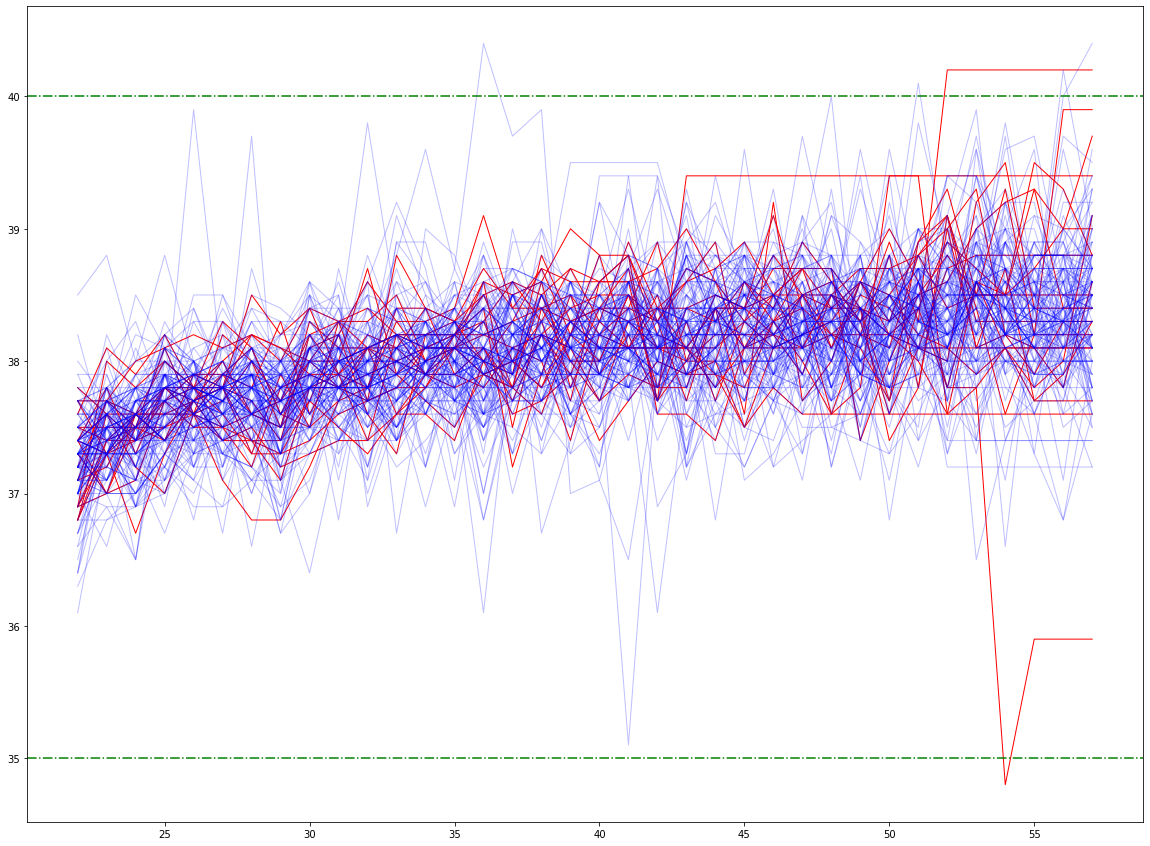

In [18]:
x = np.array(range(22, 58))
plt.figure(figsize=(20,15))
for i in range(0,167):
    y=data[i]
    
    if(i<=20):
        plt.plot(x, y, color = "red", linewidth=1)
    else:
        plt.plot(x, y, color = "blue", linewidth=1, alpha=0.25)
plt.axhline(y=40, color='g', linestyle='-.')
plt.axhline(y=35, color='g', linestyle='-.')
plt.show()

## Température diarrhé

In [25]:
data = pd.read_excel("DataChiot.xlsx")
data = data.sort_values(by=['Diarr', 'Size'], ascending=False)
del data['hospit']
del data['Died']
del data['Size']
data.head(63)

,Diarr,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,TRD29,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,1,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,37.5,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
1,1,37.4,37.8,37.3,37.8,37.8,37.6,37.3,37.3,37.7,...,38.2,38.4,37.4,37.8,39.1,38.1,38.7,37.7,37.9,38.3
3,1,37.3,37.8,36.9,37.9,37.5,37.7,37.7,37.7,37.8,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,1,37.4,37.5,37.1,37.7,37.4,37.2,37.7,37.6,37.8,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
31,1,36.1,37.3,37.0,37.5,36.8,37.8,37.9,37.4,38.0,...,37.9,38.2,38.1,38.1,38.1,38.8,38.7,38.4,38.3,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,37.0,37.6,37.4,38.1,37.9,38.0,37.9,38.0,37.6,...,38.5,38.3,38.5,38.4,38.3,38.7,38.3,38.7,38.3,38.8
111,1,38.5,38.8,38.0,38.8,38.0,38.1,38.4,38.3,38.3,...,38.6,NaN,38.3,38.5,38.5,NaN,38.9,38.1,37.6,38.5
124,1,36.9,37.5,37.5,37.9,37.3,37.3,37.2,37.0,37.9,...,38.4,38.4,38.2,39.8,38.9,38.8,NaN,NaN,NaN,NaN
149,1,37.7,37.7,38.0,38.1,38.2,38.1,38.2,38.0,38.4,...,38.5,38.2,38.1,38.8,39.0,39.3,38.2,38.1,NaN,NaN


In [26]:
del data['Diarr']
data = np.array(data)

for i in range(0,167):
    for j in range(0,36):
        if(np.isnan(data[i,j])):
            data[i,j] = data[i,j-1]
data[0]

array([37.5, 37.5, 37.5, 37.8, 37.7, 37.8, 37.3, 37.9, 37.5, 37.7, 37.8,
       38.3, 38. , 38.1, 37.9, 38. , 37.8, 38.2, 38. , 38.5, 38.3, 37.7,
       38.4, 38.4, 38.8, 38.5, 38.4, 38.4, 38.2, 38.4, 38.9, 38.7, 38.5,
       38.7, 39. , 39. ])

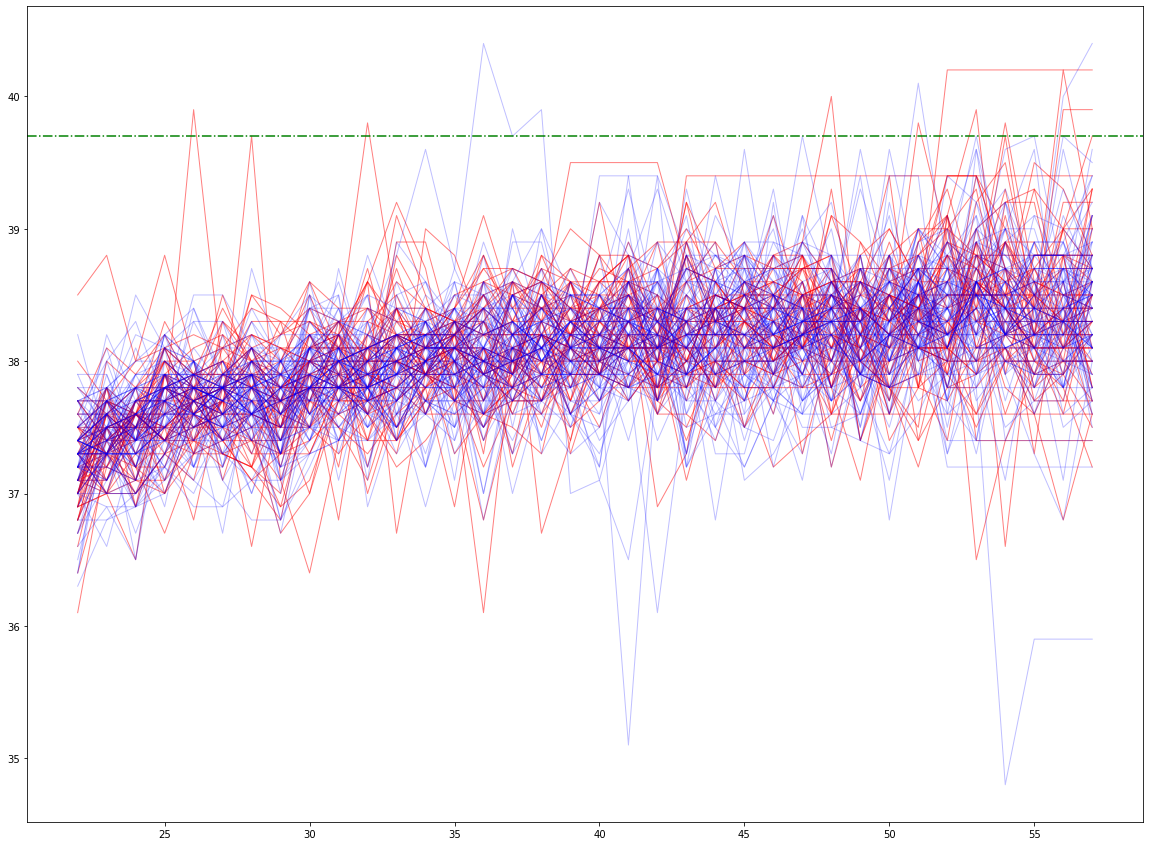

In [29]:
x = np.array(range(22, 58))
plt.figure(figsize=(20,15))
for i in range(0,167):
    y=data[i]
    
    if(i<=62):
        plt.plot(x, y, color = "red", linewidth=1, alpha= 0.5)
    else:
        plt.plot(x, y, color = "blue", linewidth=1, alpha=0.25)
plt.axhline(y=39.7, color='g', linestyle='-.')
plt.show()

## Température hospitalisation

In [32]:
data = pd.read_excel("DataChiot.xlsx")
data = data.sort_values(by=['hospit', 'Size'], ascending=False)
del data['Diarr']
del data['Died']
del data['Size']
data.head(46)

,hospit,TRD21,TRD22,TRD23,TRD24,TRD25,TRD26,TRD27,TRD28,TRD29,...,TRD47,TRD48,TRD49,TRD50,TRD51,TRD52,TRD53,TRD54,TRD55,TRD56
0,1,37.5,37.5,37.5,37.8,37.7,37.8,37.3,37.9,37.5,...,38.4,38.4,38.2,38.4,38.9,38.7,38.5,38.7,39.0,NaN
3,1,37.3,37.8,36.9,37.9,37.5,37.7,37.7,37.7,37.8,...,37.8,38.4,38.4,38.4,38.9,38.3,38.5,38.6,38.0,NaN
4,1,37.4,37.5,37.1,37.7,37.4,37.2,37.7,37.6,37.8,...,38.3,38.3,38.7,38.6,39.1,37.4,NaN,NaN,NaN,NaN
72,1,37.8,37.6,37.6,37.4,37.7,37.8,38.2,38.1,37.9,...,38.5,38.4,38.3,38.5,38.6,39.0,39.2,39.3,38.4,NaN
73,1,37.1,37.5,37.2,37.2,37.8,37.7,37.9,37.2,38.0,...,38.3,37.7,38.2,38.1,38.1,37.9,38.5,38.1,37.7,38.6
87,1,37.5,37.3,37.7,37.7,37.8,37.8,37.9,37.7,37.8,...,38.4,38.5,39.4,37.8,38.0,38.0,38.2,38.8,NaN,37.8
88,1,37.2,37.3,37.6,37.9,37.7,37.6,37.8,37.7,37.8,...,38.3,38.1,38.5,39.0,38.0,38.9,38.2,38.3,NaN,37.6
89,1,37.4,37.3,37.5,37.7,37.9,37.8,37.7,37.4,37.7,...,38.6,38.3,38.9,38.3,40.2,NaN,NaN,NaN,NaN,NaN
125,1,37.4,37.6,37.4,37.7,37.5,37.5,37.2,37.8,37.9,...,37.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,1,37.3,37.5,37.6,37.4,37.5,37.6,37.6,37.5,37.8,...,37.8,37.1,38.2,38.5,38.4,38.6,38.4,38.1,NaN,NaN


In [33]:
del data['hospit']
data = np.array(data)

for i in range(0,167):
    for j in range(0,36):
        if(np.isnan(data[i,j])):
            data[i,j] = data[i,j-1]
data[0]

array([37.5, 37.5, 37.5, 37.8, 37.7, 37.8, 37.3, 37.9, 37.5, 37.7, 37.8,
       38.3, 38. , 38.1, 37.9, 38. , 37.8, 38.2, 38. , 38.5, 38.3, 37.7,
       38.4, 38.4, 38.8, 38.5, 38.4, 38.4, 38.2, 38.4, 38.9, 38.7, 38.5,
       38.7, 39. , 39. ])

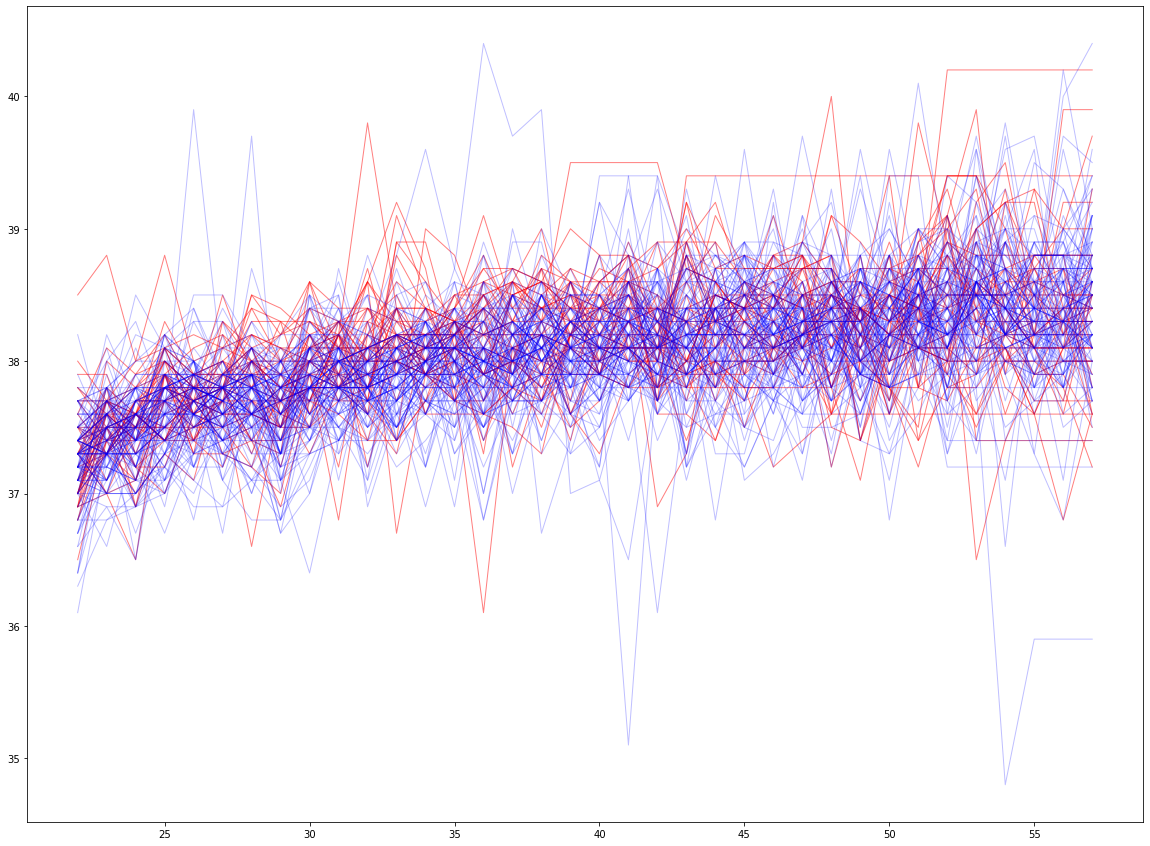

In [35]:
x = np.array(range(22, 58))
plt.figure(figsize=(20,15))
for i in range(0,167):
    y=data[i]
    
    if(i<=45):
        plt.plot(x, y, color = "red", linewidth=1, alpha= 0.5)
    else:
        plt.plot(x, y, color = "blue", linewidth=1, alpha=0.25)
plt.show()